<a href="https://www.kaggle.com/code/chandlertimm/pan-cancer-nuclei-usage?scriptVersionId=95227921" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import libraries

In [1]:
import sys
sys.path.append('./')

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import scipy.io as sio
import cv2
import json
import openslide

# Hover-Net Tile Processing Output

In [2]:
!cp -r ../input/pan-cancer-nuclei-inference/hover-net/infer_tiles ./

In [3]:
tile_path = 'infer_tiles/imgs/'
tile_json_path = 'infer_tiles/pred/json/'
tile_mat_path = 'infer_tiles/pred/mat/'
tile_overlay_path = 'infer_tiles/pred/overlay/'

In [4]:
# load the original image, the `.mat` file and the overlay

image_list = glob.glob(tile_path + '*.jpeg')
image_list.sort()


# get a random image 
rand_nr = np.random.randint(0,len(image_list))
image_file = image_list[rand_nr]


basename = os.path.basename(image_file)
image_ext = basename.split('.')[-1]
basename = basename[:-(len(image_ext)+1)]


image = cv2.imread(image_file)
# convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# get the corresponding `.mat` file 
result_mat = sio.loadmat(tile_mat_path + basename + '.mat')

# get the overlay
overlay = cv2.imread(tile_overlay_path + basename + '.png')
overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

In [5]:
# ** now, let's get the outputs and print some basic shape information
# 2D map where each nucleus has a unique ID assigned. 0 is background
inst_map = result_mat['inst_map'] 
# Nx2 length array denoting nuclear type predictions. N is the number of nuclei
# idx=0 denotes the corresponding inst_id in the `inst_map` and 
# idx=1 denotes the type of that inst_id
inst_type = result_mat['inst_type'] 

print('instance map shape', inst_map.shape)
# double check the number of instances is the same as the number of type predictions
print('number of instances', len(np.unique(inst_map)[1:].tolist()))
print('number of type predictions', len(np.unique(inst_type)))
print('overlay shape', overlay.shape)

instance map shape (256, 256)
number of instances 0
number of type predictions 0
overlay shape (256, 256, 3)


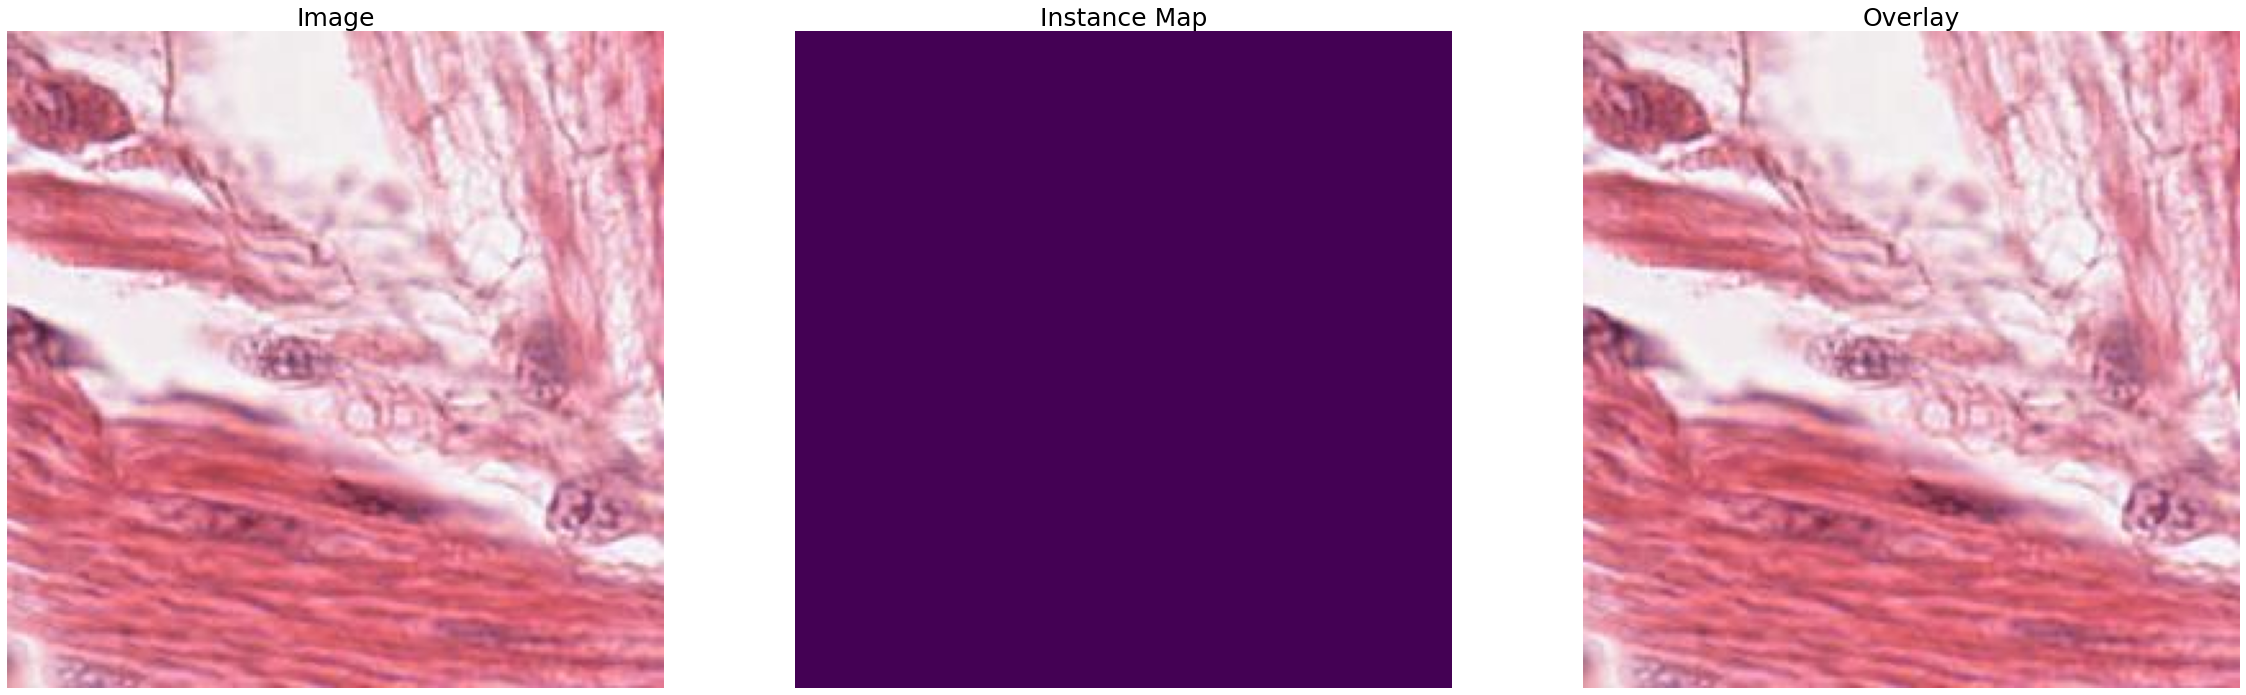

In [6]:
# plot the original image, along with the instance map and the overlay

plt.figure(figsize=(40,20))

plt.subplot(1,3,1)
plt.imshow(image[:400,:400,:])
plt.axis('off')
plt.title('Image', fontsize=25)

plt.subplot(1,3,2)
plt.imshow(inst_map[:400,:400])
plt.axis('off')
plt.title('Instance Map', fontsize=25)

plt.subplot(1,3,3)
plt.imshow(overlay[:400,:400,:])
plt.axis('off')
plt
plt.title('Overlay', fontsize=25)

plt.show()